In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import gurobipy as gp
from gurobipy import GRB
from utils.preprocessing import create_time_matrix, create_caregivers_df, create_tasks_df, create_clients_df

caregivers = create_caregivers_df('data/raw/caregivers.csv')

tasks = create_tasks_df('data/raw/hemtjanst_tasks.csv', only_client_tasks=True)

clients = create_clients_df('data/raw/clients.csv')

drive_time_matrix = create_time_matrix('data/raw/matrix_duration_matrix_DRIVE.csv')
walk_time_matrix = create_time_matrix('data/raw/matrix_duration_matrix_WALK.csv')
bicycle_time_matrix = create_time_matrix('data/raw/matrix_duration_matrix_BICYCLE.csv')

In [3]:
# Test1: Subset with only caregivers 33, 949, 1108 and their tasks
test1_subset = [33, 949, 1108]
caregivers_test1 = caregivers.loc[test1_subset]
tasks_test1 = tasks[tasks['PlannedCaregiverID'].isin(test1_subset)]

print(f"Number of caregivers in subset: {len(caregivers_test1)}")
print(f"Number of tasks assigned to subset caregivers: {len(tasks_test1)}")

# Test2: Subset with only first 10 caregivers that use car as mode of transport
car_caregivers = caregivers[caregivers['ModeOfTransport'] == 'car']
caregivers_test2 = car_caregivers.head(10)
tasks_test2 = tasks[tasks['PlannedCaregiverID'].isin(caregivers_test2.index)]

print(f"Number of caregivers in subset: {len(caregivers_test2)}")
print(f"Number of tasks assigned to subset caregivers: {len(tasks_test2)}")

Number of caregivers in subset: 3
Number of tasks assigned to subset caregivers: 27
Number of caregivers in subset: 10
Number of tasks assigned to subset caregivers: 86


In [31]:
from models.flexible_model import FlexibleModel
model_caregivers = caregivers_test2
model_tasks = tasks_test2

flexible_model = FlexibleModel(model_caregivers, model_tasks, clients, drive_time_matrix, walk_time_matrix, bicycle_time_matrix)
flexible_model.build()
flexible_model.optimize()

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[arm] - Darwin 24.3.0 24D70)

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 77507 rows, 75700 columns and 451520 nonzeros
Model fingerprint: 0x71069d35
Variable types: 880 continuous, 74820 integer (74820 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+03]
Presolve removed 74911 rows and 42581 columns
Presolve time: 0.03s
Presolved: 2596 rows, 33119 columns, 100977 nonzeros
Variable types: 20 continuous, 33099 integer (33099 binary)
Performing another presolve...
Presolve removed 820 rows and 0 columns
Presolve time: 0.13s

Root relaxation: objective 0.000000e+00, 5490 iterations, 1.23 seconds (3.04 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd 

<gurobi.Model MIP instance HomeCare: 77507 constrs, 75700 vars, Parameter changes: Username=(user-defined), LicenseID=2635249>

Model not optimally solved. Status: 11


/Users/vilhelmkarlin/Code/KTH/SA120X_KEX/utils/visualization.py:505: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  dashboard_fig.show()


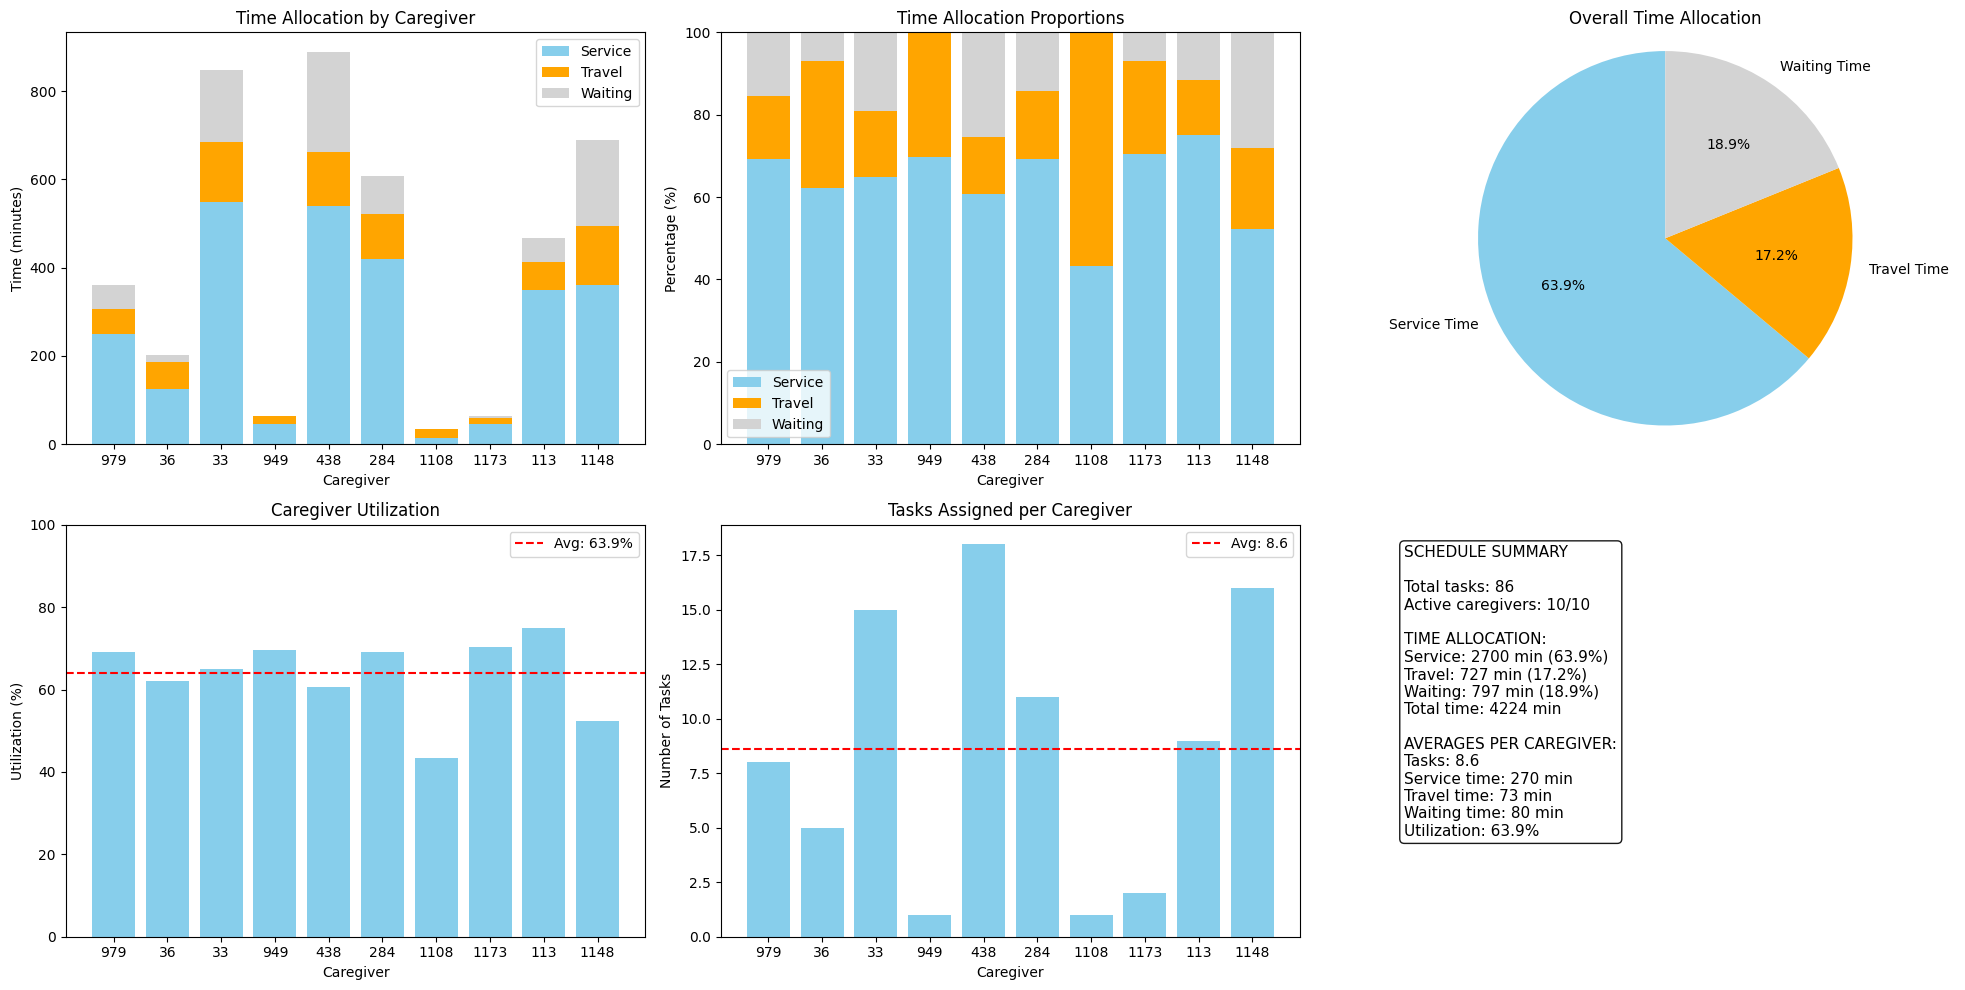

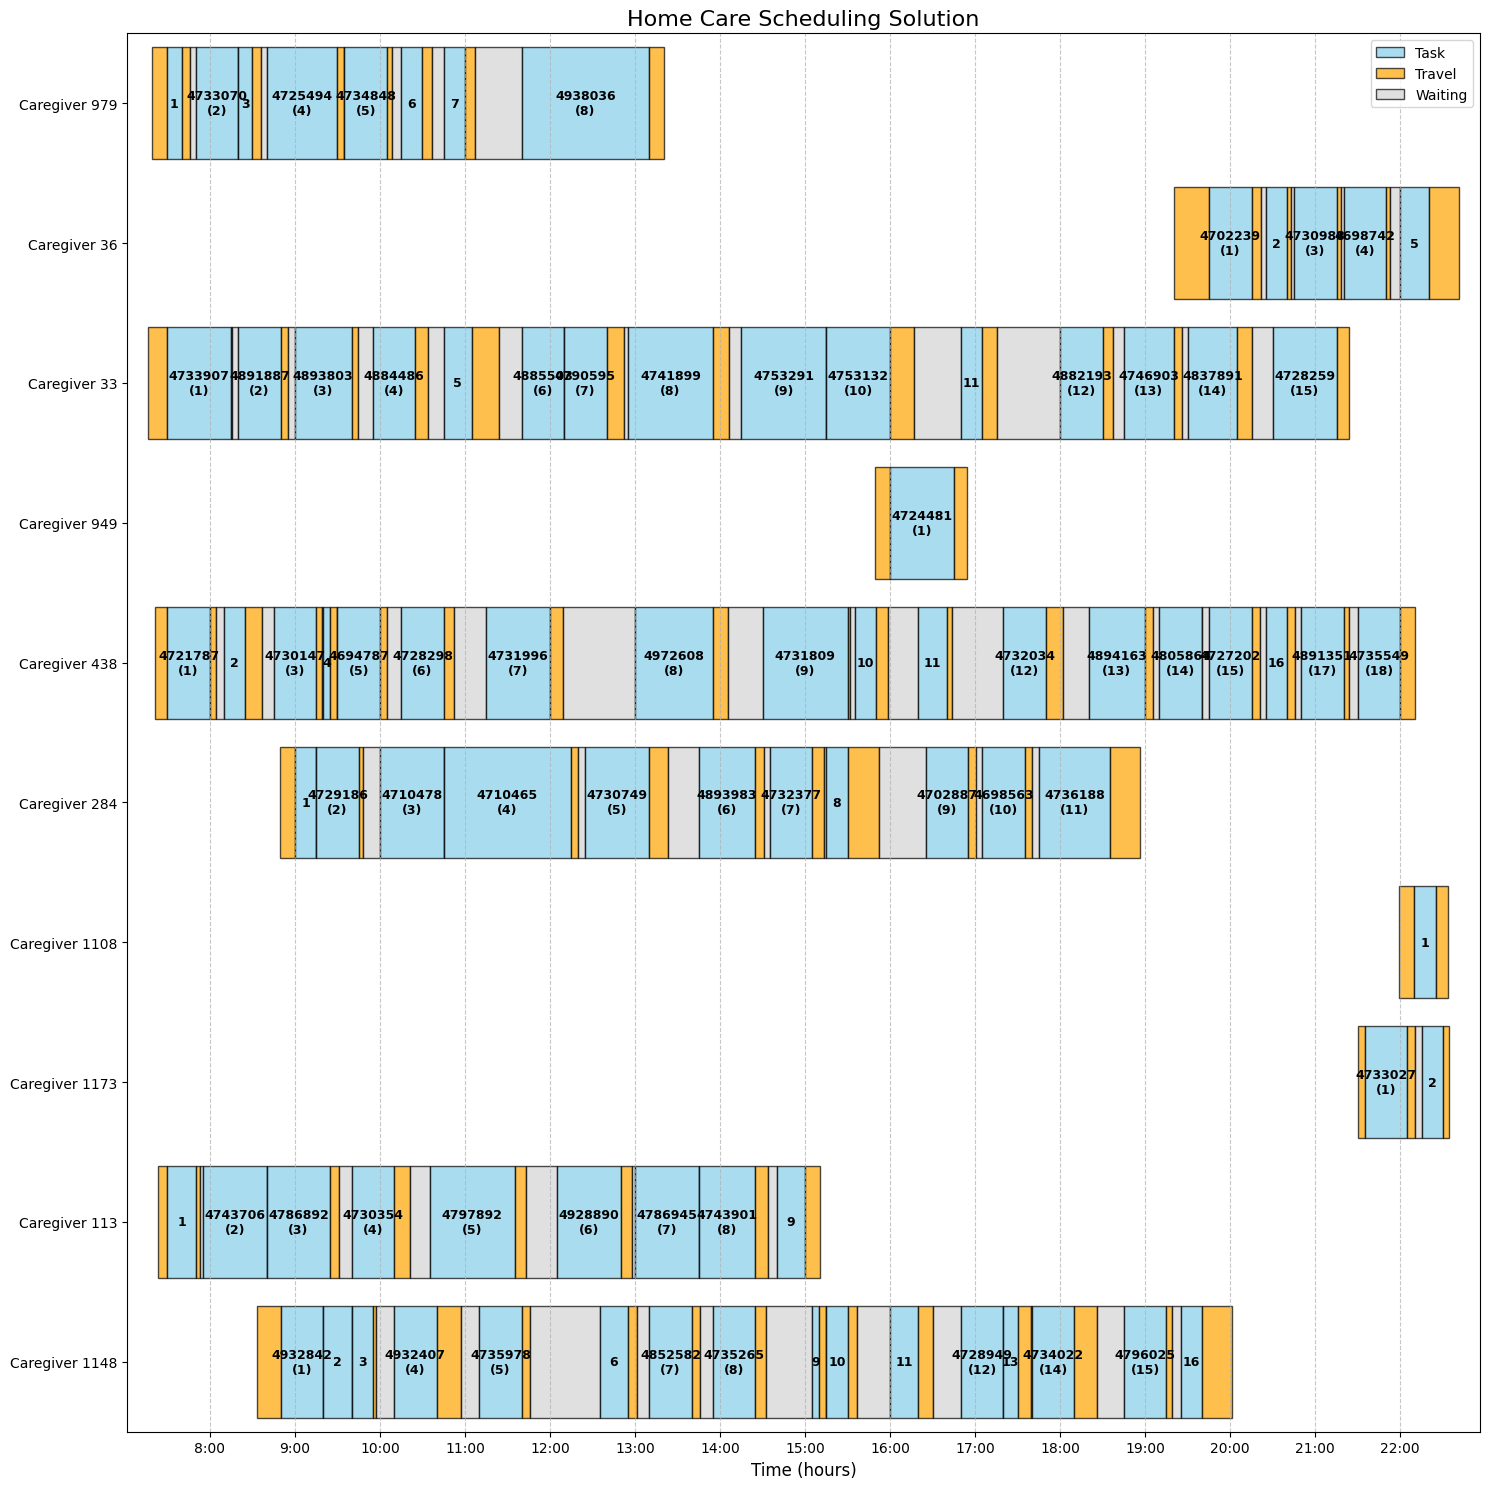

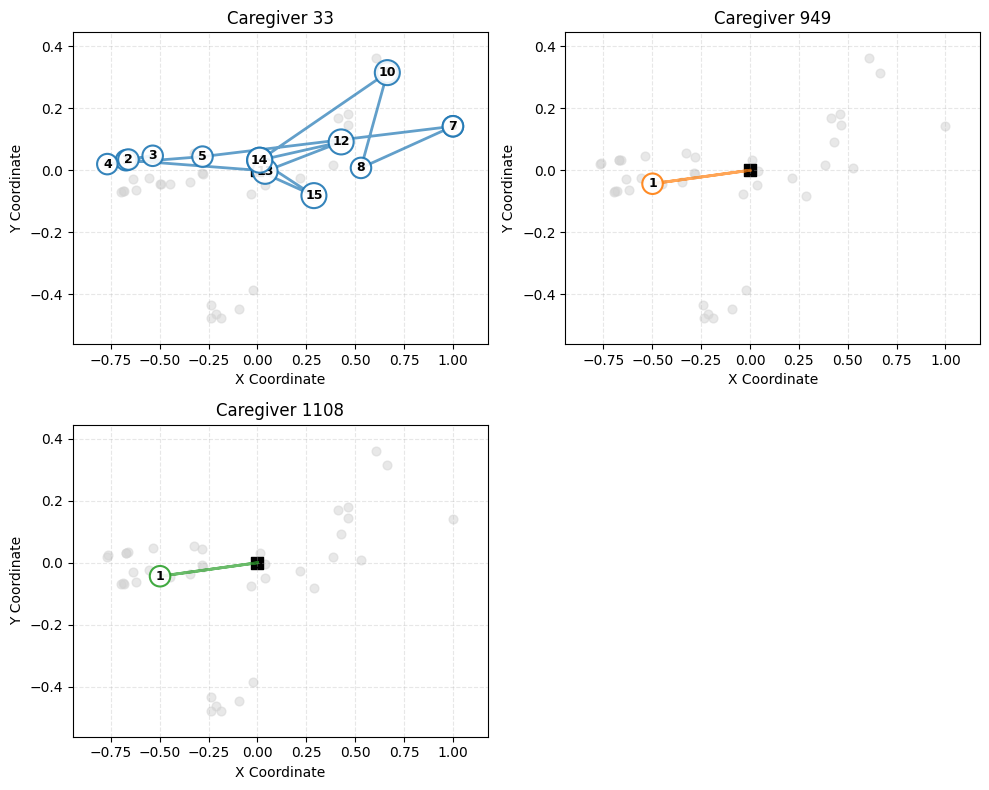

In [ ]:
from utils.visualization import visualize_schedule, visualize_metrics, visualize_routes

flexible_model.get_solution()

visualize_metrics(flexible_model, display_mode='dashboard');
visualize_schedule(flexible_model);
visualize_routes(flexible_model, subplot_mode=True);